In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4393264 sha256=b1e3856cc0337ce7c29a1a542dc65106257930624f6300ecad650fee7a8ffd42
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


**11.CNN(FastText)**

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import pandas as pd
import fasttext
from sklearn.metrics import precision_score, f1_score,recall_score

# Step 1: Load the dataset
df = pd.read_csv('/content/drive/MyDrive/merge_check.csv')

# Step 2: Preprocess the data
headlines = df['Headline'].values
content = df['Content'].values
labels = df['Label'].values

# Step 3: Tokenize and pad the sequences for Headline and Content separately
tokenizer = Tokenizer()
tokenizer.fit_on_texts(headlines)
headline_sequences = tokenizer.texts_to_sequences(headlines)
headline_sequences = pad_sequences(headline_sequences, padding='post')

tokenizer.fit_on_texts(content)
content_sequences = tokenizer.texts_to_sequences(content)
content_sequences = pad_sequences(content_sequences, padding='post')

# Step 4: Combine the sequences for Headline and Content
X = np.hstack((headline_sequences, content_sequences))

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Step 6: Create the corpus file
corpus_file = 'corpus.txt'
with open(corpus_file, 'w') as file:
    for headline, content in zip(headlines, content):
        file.write(headline + ' ' + content + '\n')

# Step 7: Train FastText embeddings
model = fasttext.train_unsupervised(corpus_file, dim=300)

# Step 8: Build the CNN model with FastText embeddings
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1

cnn_model = Sequential()
cnn_model.add(Embedding(vocab_size, embedding_dim, input_length=X_train.shape[1]))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 9: Train the CNN model
cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Step 10: Evaluate the CNN model
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

# Step 11: Make predictions
y_pred = cnn_model.predict(X_test)
y_pred = np.round(y_pred).flatten()

# Step 12: Calculate precision and F1 score
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall=recall_score(y_test,y_pred)

print("Precision:", precision)
print("F1 Score:", f1)
print("Recall:",recall)


Epoch 1/10
84/84 [==============================] - 108s 1s/step - loss: 0.4815 - accuracy: 0.8108 - val_loss: 0.2304 - val_accuracy: 0.9194
Epoch 2/10
84/84 [==============================] - 94s 1s/step - loss: 0.1250 - accuracy: 0.9560 - val_loss: 0.2076 - val_accuracy: 0.9328
Epoch 3/10
84/84 [==============================] - 91s 1s/step - loss: 0.0221 - accuracy: 0.9974 - val_loss: 0.2263 - val_accuracy: 0.9239
Epoch 4/10
84/84 [==============================] - 95s 1s/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.2368 - val_accuracy: 0.9284
Epoch 5/10
84/84 [==============================] - 91s 1s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.2460 - val_accuracy: 0.9269
Epoch 6/10
84/84 [==============================] - 98s 1s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2556 - val_accuracy: 0.9254
Epoch 7/10
84/84 [==============================] - 93s 1s/step - loss: 7.8214e-04 - accuracy: 1.0000 - val_loss: 0.2614 - val_accuracy: 0.9254
Epoch 8/10
84/8

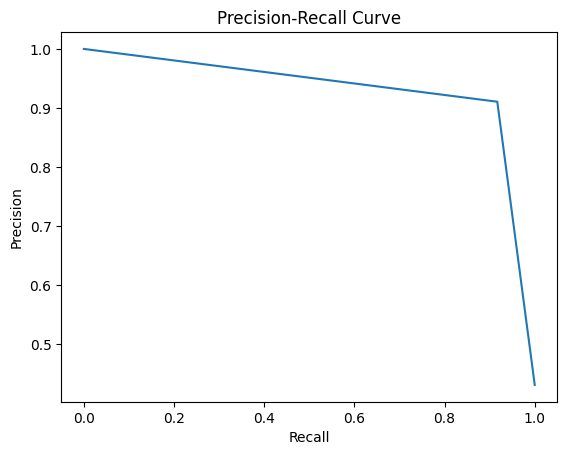

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

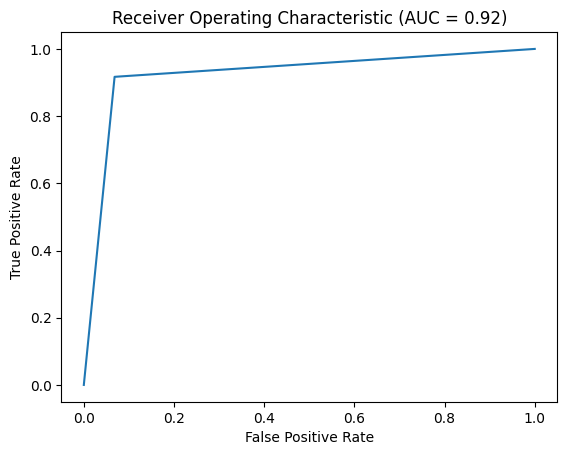

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have defined `y_test` and `y_pred` correctly
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (AUC = {:.2f})'.format(auc))
plt.show()

Confusion Matrix:
[[355  26]
 [ 24 265]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       381
           1       0.91      0.92      0.91       289

    accuracy                           0.93       670
   macro avg       0.92      0.92      0.92       670
weighted avg       0.93      0.93      0.93       670



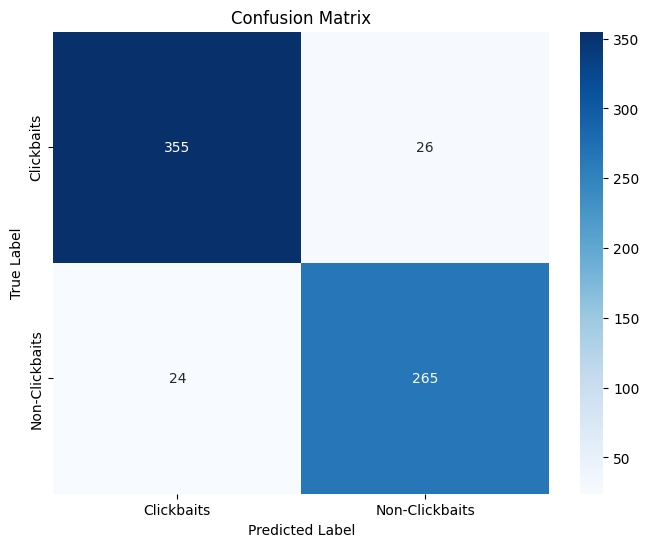

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import itertools



# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
ax.tick_params(axis='both', which='major', labelsize=10)  # Adjust to fit
ax.xaxis.set_ticklabels(['Clickbaits', 'Non-Clickbaits']);
ax.yaxis.set_ticklabels(['Clickbaits', 'Non-Clickbaits']);
plt.show()

**12.BiLSTM(FastText)**

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import pandas as pd
import fasttext
from sklearn.metrics import precision_score, f1_score,recall_score

# Step 1: Load the dataset
df = pd.read_csv('/content/drive/MyDrive/merge_check.csv')

# Step 2: Preprocess the data
headlines = df['Headline'].values
content = df['Content'].values
labels = df['Label'].values

# Step 3: Tokenize and pad the sequences for Headline and Content separately
tokenizer = Tokenizer()
tokenizer.fit_on_texts(headlines)
headline_sequences = tokenizer.texts_to_sequences(headlines)
headline_sequences = pad_sequences(headline_sequences, padding='post')

tokenizer.fit_on_texts(content)
content_sequences = tokenizer.texts_to_sequences(content)
content_sequences = pad_sequences(content_sequences, padding='post')

# Step 4: Combine the sequences for Headline and Content
X = np.hstack((headline_sequences, content_sequences))

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Step 6: Create the corpus file
corpus_file = 'corpus.txt'
with open(corpus_file, 'w') as file:
    for headline, content in zip(headlines, content):
        file.write(headline + ' ' + content + '\n')

# Step 7: Train FastText embeddings
model = fasttext.train_unsupervised(corpus_file, dim=300)

# Step 8: Create the embedding matrix
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    if word in model:
        embedding_matrix[index] = model[word]

# Step 9: Build the BiLSTM model with FastText embeddings
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix],
                    input_length=X_train.shape[1], trainable=False))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 10: Train the BiLSTM model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Step 11: Evaluate the BiLSTM model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

# Step 12: Make predictions
predictions = model.predict(X_test)
predictions = np.round(predictions).flatten()

# Step 13: Calculate precision and F1 score
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
recall=recall_score(y_test,predictions)

print("Precision:", precision)
print("F1 Score:", f1)
print("Recall:",recall)


Epoch 1/10
84/84 [==============================] - 297s 3s/step - loss: 0.5673 - accuracy: 0.6947 - val_loss: 0.6287 - val_accuracy: 0.5269
Epoch 2/10
84/84 [==============================] - 291s 3s/step - loss: 0.5265 - accuracy: 0.7331 - val_loss: 0.3207 - val_accuracy: 0.8761
Epoch 3/10
84/84 [==============================] - 307s 4s/step - loss: 0.3127 - accuracy: 0.8798 - val_loss: 0.2613 - val_accuracy: 0.9045
Epoch 4/10
84/84 [==============================] - 309s 4s/step - loss: 0.2948 - accuracy: 0.8880 - val_loss: 0.2426 - val_accuracy: 0.9179
Epoch 5/10
84/84 [==============================] - 311s 4s/step - loss: 0.2478 - accuracy: 0.9115 - val_loss: 0.2046 - val_accuracy: 0.9269
Epoch 6/10
84/84 [==============================] - 310s 4s/step - loss: 0.2331 - accuracy: 0.9156 - val_loss: 0.2579 - val_accuracy: 0.9149
Epoch 7/10
84/84 [==============================] - 310s 4s/step - loss: 0.2242 - accuracy: 0.9235 - val_loss: 0.2189 - val_accuracy: 0.9209
Epoch 8/10
84

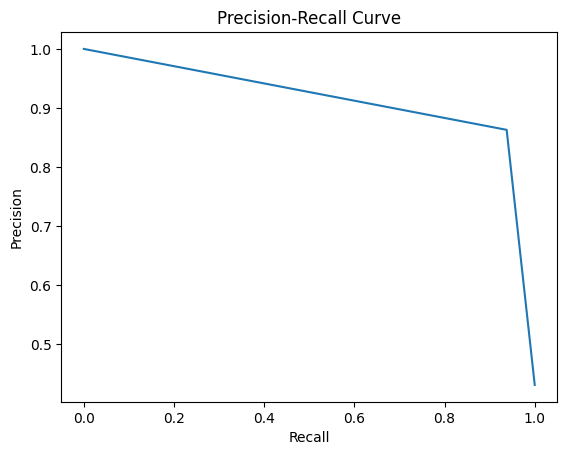

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, predictions)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

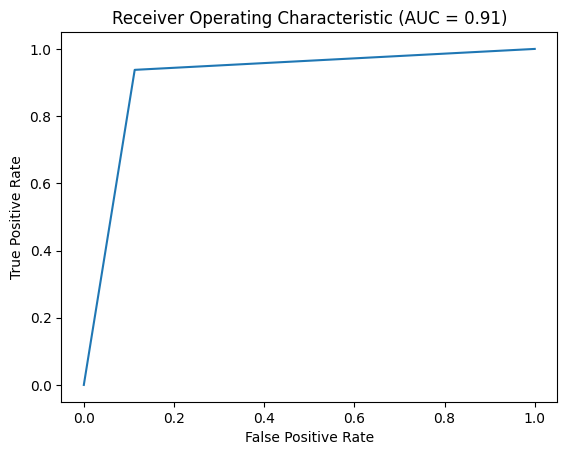

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have defined `y_test` and `y_pred` correctly
fpr, tpr, _ = roc_curve(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (AUC = {:.2f})'.format(auc))
plt.show()

Confusion Matrix:
[[338  43]
 [ 18 271]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       381
           1       0.86      0.94      0.90       289

    accuracy                           0.91       670
   macro avg       0.91      0.91      0.91       670
weighted avg       0.91      0.91      0.91       670



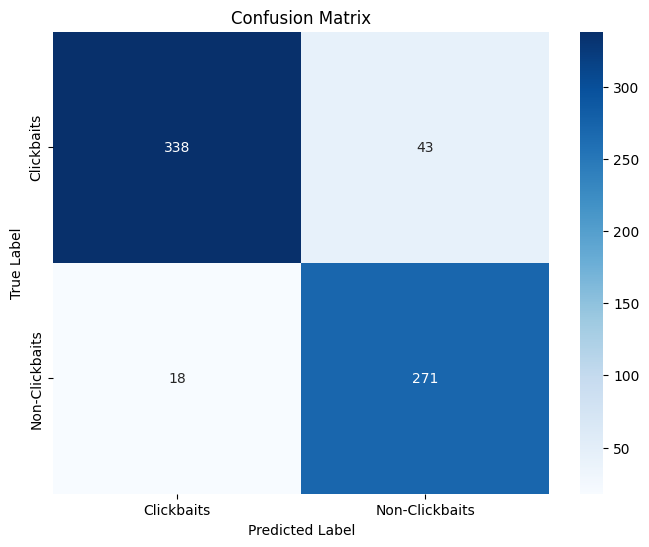

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import itertools



# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Generate classification report
report = classification_report(y_test, predictions)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
ax.tick_params(axis='both', which='major', labelsize=10)  # Adjust to fit
ax.xaxis.set_ticklabels(['Clickbaits', 'Non-Clickbaits']);
ax.yaxis.set_ticklabels(['Clickbaits', 'Non-Clickbaits']);
plt.show()

**13.LSTM(FastText)**

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import pandas as pd
import fasttext
from sklearn.metrics import precision_score, f1_score,recall_score

# Step 1: Load the dataset
df = pd.read_csv('/content/drive/MyDrive/merge_check.csv')

# Step 2: Preprocess the data
headlines = df['Headline'].values
content = df['Content'].values
labels = df['Label'].values

# Step 3: Tokenize and pad the sequences for Headline and Content separately
tokenizer = Tokenizer()
tokenizer.fit_on_texts(headlines)
headline_sequences = tokenizer.texts_to_sequences(headlines)
headline_sequences = pad_sequences(headline_sequences, padding='post')

tokenizer.fit_on_texts(content)
content_sequences = tokenizer.texts_to_sequences(content)
content_sequences = pad_sequences(content_sequences, padding='post')

# Step 4: Combine the sequences for Headline and Content
X = np.hstack((headline_sequences, content_sequences))

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Step 6: Create the corpus file
corpus_file = 'corpus.txt'
with open(corpus_file, 'w') as file:
    for headline, content in zip(headlines, content):
        file.write(headline + ' ' + content + '\n')

# Step 7: Train FastText embeddings
model = fasttext.train_unsupervised(corpus_file, dim=300)

# Step 8: Create the embedding matrix
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    if word in model:
        embedding_matrix[index] = model[word]

# Step 9: Build the LSTM model with FastText embeddings
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix],
                    input_length=X_train.shape[1], trainable=False))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 10: Calculate class weights
class_labels = np.unique(labels)
class_counts = np.bincount(labels)
total_samples = len(labels)
class_weights = {label: total_samples / count for label, count in zip(class_labels, class_counts)}

# Step 11: Train the LSTM model with class weights
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, class_weight=class_weights)

# Step 12: Evaluate the LSTM model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

# Step 13: Make predictions
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

# Step 14: Calculate precision and F1 score
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
recall=recall_score(y_test,predictions)

print("Precision:", precision)
print("F1 Score:", f1)
print("Recall Score:", recall)










Epoch 1/10
84/84 [==============================] - 152s 2s/step - loss: 1.3881 - accuracy: 0.4882 - val_loss: 0.6950 - val_accuracy: 0.4313
Epoch 2/10
84/84 [==============================] - 155s 2s/step - loss: 1.3873 - accuracy: 0.4894 - val_loss: 0.6966 - val_accuracy: 0.4313
Epoch 3/10
84/84 [==============================] - 155s 2s/step - loss: 1.3872 - accuracy: 0.4894 - val_loss: 0.6959 - val_accuracy: 0.4313
Epoch 4/10
84/84 [==============================] - 155s 2s/step - loss: 1.3871 - accuracy: 0.4894 - val_loss: 0.6965 - val_accuracy: 0.4313
Epoch 5/10
84/84 [==============================] - 155s 2s/step - loss: 1.3872 - accuracy: 0.4894 - val_loss: 0.6957 - val_accuracy: 0.4313
Epoch 6/10
84/84 [==============================] - 149s 2s/step - loss: 1.3870 - accuracy: 0.4894 - val_loss: 0.6973 - val_accuracy: 0.4313
Epoch 7/10
84/84 [==============================] - 158s 2s/step - loss: 1.3874 - accuracy: 0.4894 - val_loss: 0.6960 - val_accuracy: 0.4313
Epoch 8/10
84

In [ ]:
pip install -U bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 55.7 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=a56a23f0f976ea191dcb61fad7ff91c4d8d02533b450324d44c1fd5b5e85c90e
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


**14.BiLSTM(Pretrained Word_2_vec)**

In [ ]:
!pip install git+https://github.com/maciejkula/glove-python.git


  Cloning https://github.com/maciejkula/glove-python.git to /tmp/pip-req-build-2wow00d5
  Running command git clone --filter=blob:none --quiet https://github.com/maciejkula/glove-python.git /tmp/pip-req-build-2wow00d5
  Resolved https://github.com/maciejkula/glove-python.git to commit 749494290fdfd24379dcc2e244c583ee61808634
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for glove-python
  Running setup.py clean for glove-python
  error: subprocess-exited-with-error
  
  × python setup.py clean did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed cleaning build dir for glove-python
Failed to build glove-python

In [ ]:
pip install glove_python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.1/263.1 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for glove_python
  Running setup.py clean for glove_python
  error: subprocess-exited-with-error
  
  × python setup.py clean did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed cleaning build dir for glove_python
Failed to build glove_python
ERROR: Could not build wheels for glove_python, which is required to install pyproject.toml-based projects




```
# This is formatted as code
```

**15.CNN(Glove)**

In [ ]:
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import precision_score, f1_score,recall_score

def train_glove(texts, embedding_dim, window_size=10, learning_rate=0.05, epochs=100):
    vectorizer = CountVectorizer(tokenizer=lambda text: text.split(), lowercase=False)
    co_occurrences = vectorizer.fit_transform(texts)

    # Reduce the dimensionality of the co-occurrences matrix using TruncatedSVD
    svd = TruncatedSVD(n_components=embedding_dim)
    co_occurrences_reduced = svd.fit_transform(co_occurrences)

    # Perform SVD on the reduced matrix
    U, _, _ = np.linalg.svd(co_occurrences_reduced)

    # Retrieve the word embeddings from the SVD results
    embedding_matrix = U[:, :embedding_dim]

    # Create a dictionary mapping words to their corresponding embedding vectors
    vocabulary = vectorizer.vocabulary_
    word_embeddings = {word: embedding for word, embedding in zip(vocabulary, embedding_matrix)}

    return word_embeddings

# Step 1: Load the dataset from CSV
df = pd.read_csv('/content/drive/MyDrive/merge_check.csv')
headlines = df['Headline'].values
content = df['Content'].values
labels = df['Label'].values
texts = headlines + ' ' + content

# Step 2: Train the GloVe embeddings
embedding_dim = 100  # Set the desired embedding dimension
word_embeddings = train_glove(texts, embedding_dim)

# Step 3: Preprocess the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)
vocab_size = len(tokenizer.word_index) + 1

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)

# Step 5: Create the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    if word in word_embeddings:
        embedding_matrix[index] = word_embeddings[word]

# Step 6: Build the CNN model with GloVe embeddings
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix],
                    input_length=max_sequence_length, trainable=False))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 10: Calculate class weights
class_labels = np.unique(labels)
class_counts = np.bincount(labels)
total_samples = len(labels)
class_weights = {label: total_samples / count for label, count in zip(class_labels, class_counts)}

# Step 11: Train the LSTM model with class weights
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, class_weight=class_weights)

# Step 12: Evaluate the LSTM model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

# Step 13: Make predictions
predictions = model.predict(X_test)
threshold = 0.5  # Adjust the threshold as desired
predicted_labels = ['Clickbaits' if pred > threshold else 'Non-Clickbaits' for pred in predictions]

# Step 14: Convert labels to consistent type
y_test = np.array(['Clickbaits' if label == 1 else 'Non-Clickbaits' for label in y_test])

# Step 15: Calculate precision and F1 score
precision = precision_score(y_test, predicted_labels, pos_label='Clickbaits')
f1 = f1_score(y_test, predicted_labels, pos_label='Clickbaits')
recall = recall_score(y_test, predicted_labels, pos_label='Clickbaits')

print("Precision:", precision)
print("F1 Score:", f1)
print("Recall Score:", recall)






/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Epoch 1/10
84/84 [==============================] - 26s 268ms/step - loss: 1.3530 - accuracy: 0.6249 - val_loss: 0.6505 - val_accuracy: 0.7000
Epoch 2/10
84/84 [==============================] - 26s 310ms/step - loss: 1.2458 - accuracy: 0.7107 - val_loss: 0.6023 - val_accuracy: 0.6925
Epoch 3/10
84/84 [==============================] - 19s 223ms/step - loss: 1.1282 - accuracy: 0.7439 - val_loss: 0.5539 - val_accuracy: 0.7358
Epoch 4/10
84/84 [==============================] - 22s 265ms/step - loss: 1.0086 - accuracy: 0.7887 - val_loss: 0.4886 - val_accuracy: 0.8000
Epoch 5/10
84/84 [==============================] - 31s 375ms/step - loss: 0.9010 - accuracy: 0.8193 - val_loss: 0.4544 - val_accuracy: 0.8119
Epoch 6/10
84/84 [==============================] - 17s 203ms/step - loss: 0.8141 - accuracy: 0.8458 - val_loss: 0.4270 - val_accuracy: 0.8313
Epoch 7/10
84/84 [==============================] - 17s 204ms/step - loss: 0.7396 - accuracy: 0.8611 - val_loss: 0.4176 - val_accuracy: 0.8239

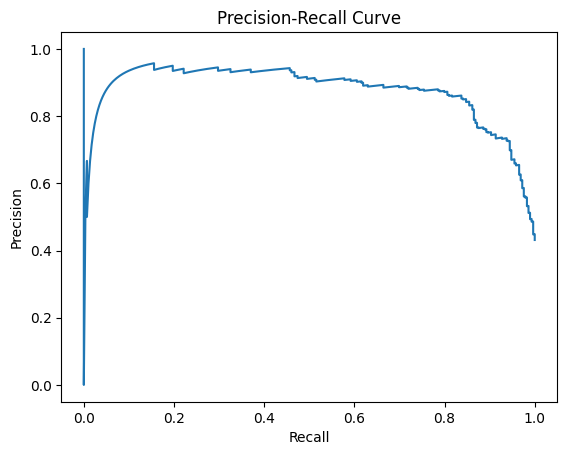

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Step 17: Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, predictions, pos_label='Clickbaits')

# Step 18: Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

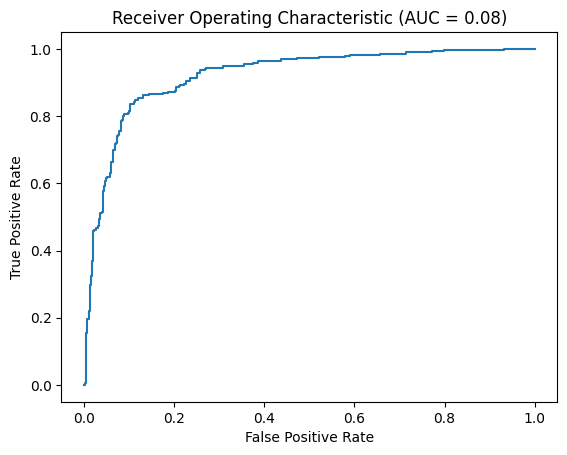

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have defined `y_test` and `predictions` correctly
fpr, tpr, _ = roc_curve(y_test, predictions, pos_label='Clickbaits')
auc = roc_auc_score(y_test, predictions)
# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (AUC = {:.2f})'.format(auc))
plt.show()

Confusion Matrix:
[[331  50]
 [ 41 248]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       381
           1       0.83      0.86      0.84       289

    accuracy                           0.86       670
   macro avg       0.86      0.86      0.86       670
weighted avg       0.86      0.86      0.86       670



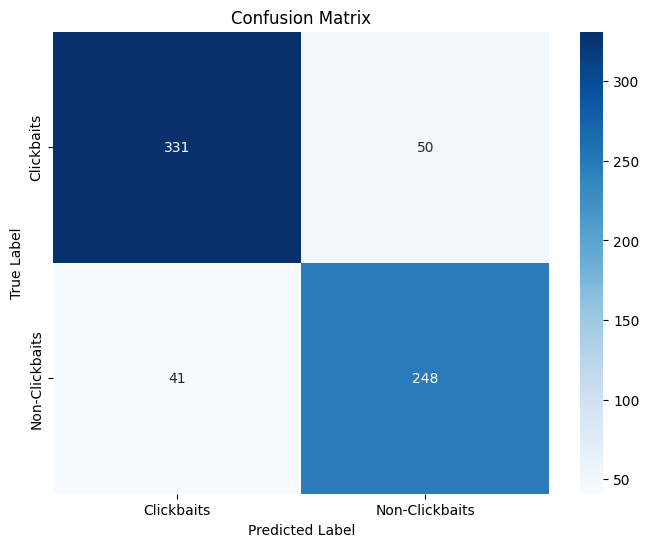

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert continuous predictions to binary labels
binary_predictions = np.where(predictions >= 0.5, 1, 0)

# Convert labels to integer type
y_test = np.array(['Clickbaits' if label == 'Clickbaits' else 'Non-Clickbaits' for label in y_test])
y_test = np.where(y_test == 'Clickbaits', 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, binary_predictions)

# Generate classification report
report = classification_report(y_test, binary_predictions)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.set_ticklabels(['Clickbaits', 'Non-Clickbaits'])
ax.yaxis.set_ticklabels(['Clickbaits', 'Non-Clickbaits'])
plt.show()

**16.LSTM(Glove)**

In [ ]:
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import precision_score, f1_score,recall_score

def train_glove(texts, embedding_dim, window_size=10, learning_rate=0.05, epochs=100):
    vectorizer = CountVectorizer(tokenizer=lambda text: text.split(), lowercase=False)
    co_occurrences = vectorizer.fit_transform(texts)

    # Reduce the dimensionality of the co-occurrences matrix using TruncatedSVD
    svd = TruncatedSVD(n_components=embedding_dim)
    co_occurrences_reduced = svd.fit_transform(co_occurrences)

    # Perform SVD on the reduced matrix
    U, _, _ = np.linalg.svd(co_occurrences_reduced)

    # Retrieve the word embeddings from the SVD results
    embedding_matrix = U[:, :embedding_dim]

    # Create a dictionary mapping words to their corresponding embedding vectors
    vocabulary = vectorizer.vocabulary_
    word_embeddings = {word: embedding for word, embedding in zip(vocabulary, embedding_matrix)}

    return word_embeddings

# Step 1: Load the dataset from CSV
df = pd.read_csv('/content/drive/MyDrive/merge_check.csv')
headlines = df['Headline'].values
content = df['Content'].values
labels = df['Label'].values
texts = headlines + ' ' + content

# Step 2: Train the GloVe embeddings
embedding_dim = 100  # Set the desired embedding dimension
word_embeddings = train_glove(texts, embedding_dim)

# Step 3: Preprocess the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)
vocab_size = len(tokenizer.word_index) + 1

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)

# Step 5: Create the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    if word in word_embeddings:
        embedding_matrix[index] = word_embeddings[word]

# Step 6: Build the LSTM model with GloVe embeddings
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix],
                    input_length=max_sequence_length, trainable=False))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 10: Calculate class weights
class_labels = np.unique(labels)
class_counts = np.bincount(labels)
total_samples = len(labels)
class_weights = {label: total_samples / count for label, count in zip(class_labels, class_counts)}

# Step 11: Train the LSTM model with class weights
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, class_weight=class_weights)

# Step 12: Evaluate the LSTM model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

# Step 13: Make predictions
predictions = model.predict(X_test)
threshold = 0.5  # Adjust the threshold as desired
predicted_labels = ['Clickbaits' if pred > threshold else 'Non-Clickbaits' for pred in predictions]

# Step 14: Convert labels to consistent type
y_test = np.array(['Clickbaits' if label == 1 else 'Non-Clickbaits' for label in y_test])

# Step 15: Calculate precision and F1 score
precision = precision_score(y_test, predicted_labels, pos_label='Clickbaits')
f1 = f1_score(y_test, predicted_labels, pos_label='Clickbaits')
recall = recall_score(y_test, predicted_labels, pos_label='Clickbaits')

print("Precision:", precision)
print("F1 Score:", f1)
print("Recall Score:", recall)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Epoch 1/10
84/84 [==============================] - 113s 1s/step - loss: 1.4285 - accuracy: 0.5241 - val_loss: 0.6823 - val_accuracy: 0.5731
Epoch 2/10
84/84 [==============================] - 112s 1s/step - loss: 1.3779 - accuracy: 0.5625 - val_loss: 0.6865 - val_accuracy: 0.6776
Epoch 3/10
84/84 [==============================] - 111s 1s/step - loss: 1.3490 - accuracy: 0.6204 - val_loss: 0.6408 - val_accuracy: 0.6269
Epoch 4/10
84/84 [==============================] - 109s 1s/step - loss: 1.3583 - accuracy: 0.5909 - val_loss: 0.6666 - val_accuracy: 0.6791
Epoch 5/10
84/84 [==============================] - 110s 1s/step - loss: 1.3243 - accuracy: 0.6700 - val_loss: 0.5867 - val_accuracy: 0.7119
Epoch 6/10
84/84 [==============================] - 110s 1s/step - loss: 1.2790 - accuracy: 0.6297 - val_loss: 0.6658 - val_accuracy: 0.5627
Epoch 7/10
84/84 [==============================] - 110s 1s/step - loss: 1.1768 - accuracy: 0.6898 - val_loss: 0.5076 - val_accuracy: 0.7612
Epoch 8/10
84

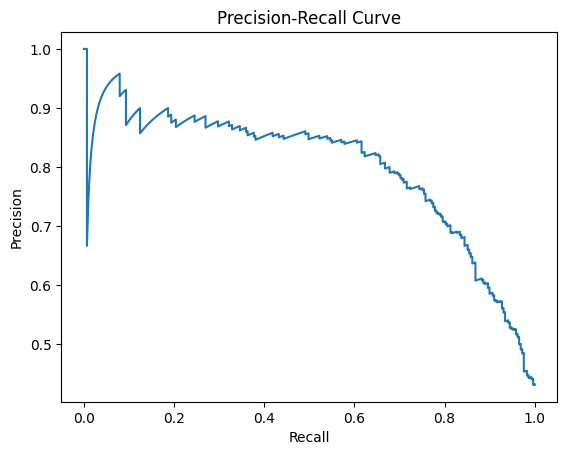

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Step 17: Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, predictions, pos_label='Clickbaits')

# Step 18: Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

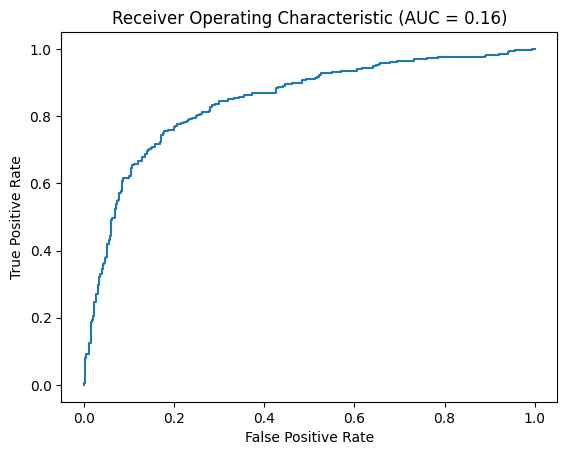

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have defined `y_test` and `predictions` correctly
fpr, tpr, _ = roc_curve(y_test, predictions, pos_label='Clickbaits')
auc = roc_auc_score(y_test, predictions)
# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (AUC = {:.2f})'.format(auc))
plt.show()

Confusion Matrix:
[[349  32]
 [120 169]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       381
           1       0.84      0.58      0.69       289

    accuracy                           0.77       670
   macro avg       0.79      0.75      0.76       670
weighted avg       0.79      0.77      0.76       670



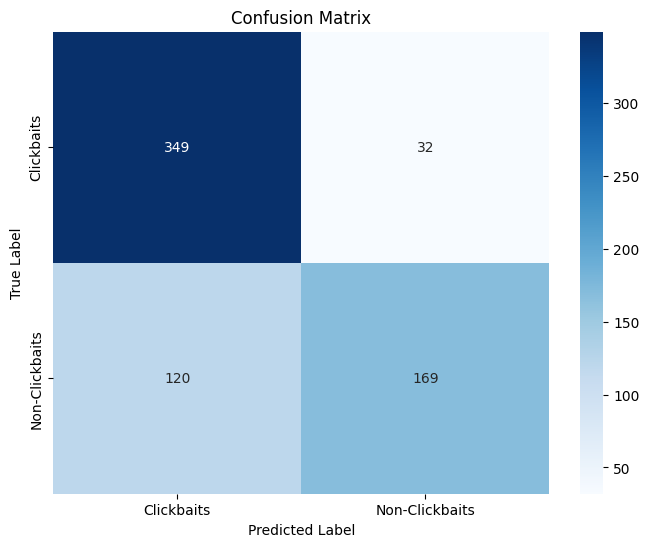

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert continuous predictions to binary labels
binary_predictions = np.where(predictions >= 0.5, 1, 0)

# Convert labels to integer type
y_test = np.array(['Clickbaits' if label == 'Clickbaits' else 'Non-Clickbaits' for label in y_test])
y_test = np.where(y_test == 'Clickbaits', 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, binary_predictions)

# Generate classification report
report = classification_report(y_test, binary_predictions)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.set_ticklabels(['Clickbaits', 'Non-Clickbaits'])
ax.yaxis.set_ticklabels(['Clickbaits', 'Non-Clickbaits'])
plt.show()

**Ensemble**

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, LSTM
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import pandas as pd
import fasttext
from sklearn.metrics import precision_score, f1_score,accuracy_score,recall_score
from sklearn.preprocessing import label_binarize

# Step 1: Load the dataset
df = pd.read_csv('/content/drive/MyDrive/merge_check.csv')

# Step 2: Preprocess the data
headlines = df['Headline'].values
content = df['Content'].values
labels = df['Label'].values

texts = headlines + ' ' + content

# Step 3: Tokenize the texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Step 4: Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)



# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.3, random_state=42)

# Convert the true labels to binary format
y_test_binary = label_binarize(y_test, classes=[0, 1])

# Step 6: Create the corpus file
corpus_file = 'corpus.txt'
with open(corpus_file, 'w') as file:
    for headline, content in zip(headlines, content):
        file.write(headline + ' ' + content + '\n')

# Step 7: Train FastText embeddings
model1 = fasttext.train_unsupervised(corpus_file, dim=300)

# Step 8: Create the embedding matrix for model1
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1

embedding_matrix1 = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    if word in model1:
        embedding_matrix1[index] = model1[word]

# Step 9: Build the BiLSTM model with FastText embeddings (model1)
model1 = Sequential()
model1.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix1],
                     input_length=X_train.shape[1], trainable=False))
model1.add(Bidirectional(LSTM(128)))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 10: Train the BiLSTM model (model1)
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Step 11: Evaluate the BiLSTM model (model1)
loss, accuracy = model1.evaluate(X_test, y_test)
print("Model 1 Accuracy:", accuracy)

# Step 12: Make predictions using model1
predictions1 = model1.predict(X_test)

# Step 13: Train and evaluate model2 (CNN)
# ... (code for model2 - CNN)

# Step 6: Load the pre-trained Word2Vec embeddings
word2vec_path = '/content/drive/MyDrive/bnwiki_word2vec.model'
word_vectors = Word2Vec.load(word2vec_path)
word_vectors.syn1neg = np.load('/content/drive/MyDrive/bnwiki_word2vec.model.syn1neg.npy')
word_vectors.wv.vectors = np.load('/content/drive/MyDrive/bnwiki_word2vec.model.wv.vectors.npy')

# Step 7: Create the embedding matrix
embedding_dim = word_vectors.vector_size
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    if word in word_vectors.wv:
        embedding_matrix[index] = word_vectors.wv[word]


model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix],
                    input_length=max_sequence_length, trainable=False))
model2.add(Conv1D(128, 5, activation='relu'))
model2.add(GlobalMaxPooling1D())
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 9: Train the CNN model
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Step 10: Evaluate the CNN model
loss, accuracy = model2.evaluate(X_test, y_test)
print("Model2 Accuracy:", accuracy)



# Step 14: Make predictions using model2 (CNN)
# ... (code for predicting using model2 - CNN)
# Step 9: Make predictions
#new_df = pd.read_csv('/content/drive/MyDrive/merge_check.csv')
#new_headlines = new_df['Headline'].values
#new_content = new_df['Content'].values
#new_texts = new_headlines + ' ' + new_content
#new_sequences = tokenizer.texts_to_sequences(new_texts)
#new_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)
predictions2 = model2.predict(X_test)

# Step 15: Train and evaluate model3 (LSTM)
# ... (code for model3 - LSTM)
model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix],
                    input_length=max_sequence_length, trainable=False))
model3.add(LSTM(128))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 9: Train the LSTM model
model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Step 10: Evaluate the LSTM model
loss, accuracy = model3.evaluate(X_test, y_test)
print("Model3 Accuracy:", accuracy)


# Step 16: Make predictions using model3 (LSTM)
# ... (code for predicting using model3 - LSTM)
# Step 9: Make predictions
#new_df = pd.read_csv('/content/drive/MyDrive/merge_check.csv')
#new_headlines = new_df['Headline'].values
#new_content = new_df['Content'].values
#new_texts = new_headlines + ' ' + new_content
#new_sequences = tokenizer.texts_to_sequences(new_texts)
#new_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)
#predictions3 = model3.predict(new_sequences)
predictions3 = model3.predict(X_test)


# Step 17: Train and evaluate model4 (CNN)
# ... (code for model4 - CNN)
model4 = fasttext.train_unsupervised(corpus_file, dim=300)

# Step 8: Build the CNN model with FastText embeddings
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1

model4 = Sequential()
model4.add(Embedding(vocab_size, embedding_dim, input_length=X_train.shape[1]))
model4.add(Conv1D(128, 5, activation='relu'))
model4.add(GlobalMaxPooling1D())
model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 9: Train the CNN model
model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Step 10: Evaluate the CNN model
loss, accuracy = model4.evaluate(X_test, y_test)
print("Model4 Accuracy:", accuracy)


# Step 18: Make predictions using model4 (CNN)
# ... (code for predicting using model4 - CNN)
# Step 11: Make predictions
predictions4 = model4.predict(X_test)
predictions4 = np.round(predictions4).flatten()

# Step 19: Calculate weighted average of predictions from all models
weights = [0.4, 0.2, 0.2, 0.2]  # Weights for each model's predictions
# Step 17: Combine predictions from all models using weighted averaging
ensemble_predictions = (weights[0] * predictions1 + weights[1] * predictions2 +
                        weights[2] * predictions3 + weights[3] * predictions4) / np.sum(weights)
ensemble_predictions = np.where(ensemble_predictions > 0.5, 1, 0)

# Calculate ensemble metrics
ensemble_accuracy = accuracy_score(y_test_binary, ensemble_predictions)
ensemble_precision = precision_score(y_test_binary, ensemble_predictions)
ensemble_f1 = f1_score(y_test_binary, ensemble_predictions)
ensemble_recall = recall_score(y_test_binary, ensemble_predictions)

# Step 19: Print ensemble metrics
print("Ensemble Accuracy:", ensemble_accuracy)
print("Ensemble Precision:", ensemble_precision)
print("Ensemble F1 Score:", ensemble_f1)
print("Ensemble Recall:", ensemble_recall)

Epoch 1/10
74/74 [==============================] - 275s 4s/step - loss: 0.4322 - accuracy: 0.8183 - val_loss: 0.3669 - val_accuracy: 0.9055
Epoch 2/10
74/74 [==============================] - 266s 4s/step - loss: 0.4501 - accuracy: 0.8055 - val_loss: 0.5634 - val_accuracy: 0.7900
Epoch 3/10
74/74 [==============================] - 270s 4s/step - loss: 0.4289 - accuracy: 0.8221 - val_loss: 0.3662 - val_accuracy: 0.8697
Epoch 4/10
74/74 [==============================] - 263s 4s/step - loss: 0.4341 - accuracy: 0.8166 - val_loss: 0.3316 - val_accuracy: 0.8746
Epoch 5/10
74/74 [==============================] - 263s 4s/step - loss: 0.2897 - accuracy: 0.9002 - val_loss: 0.2576 - val_accuracy: 0.9114
Epoch 6/10
74/74 [==============================] - 271s 4s/step - loss: 0.2527 - accuracy: 0.9104 - val_loss: 0.2516 - val_accuracy: 0.9174
Epoch 7/10
74/74 [==============================] - 276s 4s/step - loss: 0.2503 - accuracy: 0.9032 - val_loss: 0.2605 - val_accuracy: 0.9154
Epoch 8/10
74

ValueError: ignored

(**BiLSTM(Keras)**)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from sklearn.metrics import precision_score, f1_score,recall_score

# Load the CSV file
data = pd.read_csv("/content/drive/MyDrive/merge_check.csv")

# Extract the text and label columns from the CSV
texts = data["Headline"].tolist()
texts = data["Content"].tolist()
labels = data["Label"].tolist()

# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

# Preprocess your text data and convert it to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Convert text sequences to padded sequences
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Split the data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Convert labels to NumPy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)

# Define the BiLSTM model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

# Evaluate the model
# Convert X_test and y_test to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate precision and F1 score
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall=recall_score(y_test,y_pred)

print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall Score: {recall:.4f}")


Epoch 1/10
37/37 [==============================] - 157s 4s/step - loss: 0.5384 - accuracy: 0.7483 - val_loss: 0.2131 - val_accuracy: 0.9283
Epoch 2/10
37/37 [==============================] - 160s 4s/step - loss: 0.1441 - accuracy: 0.9608 - val_loss: 0.2005 - val_accuracy: 0.9303
Epoch 3/10
37/37 [==============================] - 160s 4s/step - loss: 0.0423 - accuracy: 0.9906 - val_loss: 0.1920 - val_accuracy: 0.9283
Epoch 4/10
37/37 [==============================] - 163s 4s/step - loss: 0.0212 - accuracy: 0.9962 - val_loss: 0.2237 - val_accuracy: 0.9104
Epoch 5/10
37/37 [==============================] - 158s 4s/step - loss: 0.0063 - accuracy: 0.9991 - val_loss: 0.3267 - val_accuracy: 0.9203
Epoch 6/10
37/37 [==============================] - 150s 4s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.2620 - val_accuracy: 0.9402
Epoch 7/10
37/37 [==============================] - 150s 4s/step - loss: 7.4854e-04 - accuracy: 1.0000 - val_loss: 0.2954 - val_accuracy: 0.9442
Epoch 8/1

**CNN(Keras)**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.metrics import precision_score, f1_score,recall_score

# Load the CSV file
data = pd.read_csv("/content/drive/MyDrive/merge_check.csv")

# Extract the text and label columns from the CSV
texts = data["Headline"].tolist()
texts = data["Content"].tolist()
labels = data["Label"].tolist()

# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

# Preprocess your text data and convert it to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Convert text sequences to padded sequences
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Split the data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Convert labels to NumPy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)

# Define the CNN model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

# Evaluate the model
# Convert X_test and y_test to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate precision and F1 score
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall=recall_score(y_test,y_pred)

print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall Score: {recall:.4f}")


Epoch 1/10
37/37 [==============================] - 23s 591ms/step - loss: 0.6477 - accuracy: 0.7325 - val_loss: 0.5502 - val_accuracy: 0.9263
Epoch 2/10
37/37 [==============================] - 24s 646ms/step - loss: 0.3540 - accuracy: 0.9462 - val_loss: 0.2055 - val_accuracy: 0.9363
Epoch 3/10
37/37 [==============================] - 23s 626ms/step - loss: 0.1289 - accuracy: 0.9569 - val_loss: 0.1569 - val_accuracy: 0.9442
Epoch 4/10
37/37 [==============================] - 23s 637ms/step - loss: 0.0457 - accuracy: 0.9910 - val_loss: 0.1525 - val_accuracy: 0.9422
Epoch 5/10
37/37 [==============================] - 21s 569ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.1426 - val_accuracy: 0.9462
Epoch 6/10
37/37 [==============================] - 23s 607ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.1448 - val_accuracy: 0.9462
Epoch 7/10
37/37 [==============================] - 23s 624ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.1482 - val_accuracy: 0.9482

**LSTM(Keras)**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import precision_score, f1_score,recall_score

# Load the CSV file
data = pd.read_csv("/content/drive/MyDrive/merge_check.csv")

# Extract the text and label columns from the CSV
texts = data["Headline"].tolist()
texts = data["Content"].tolist()
labels = data["Label"].tolist()

# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

# Preprocess your text data and convert it to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Convert text sequences to padded sequences
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Split the data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Convert labels to NumPy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)

# Define the LSTM model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

# Evaluate the model
# Convert X_test and y_test to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate precision and F1 score
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall=recall_score(y_test,y_pred)

print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall Score: {recall:.4f}")


Epoch 1/10
37/37 [==============================] - 87s 2s/step - loss: 0.6160 - accuracy: 0.6591 - val_loss: 0.5113 - val_accuracy: 0.8466
Epoch 2/10
37/37 [==============================] - 81s 2s/step - loss: 0.2205 - accuracy: 0.9420 - val_loss: 0.2355 - val_accuracy: 0.9243
Epoch 3/10
37/37 [==============================] - 81s 2s/step - loss: 0.0582 - accuracy: 0.9859 - val_loss: 0.1939 - val_accuracy: 0.9363
Epoch 4/10
37/37 [==============================] - 84s 2s/step - loss: 0.0145 - accuracy: 0.9970 - val_loss: 0.2144 - val_accuracy: 0.9382
Epoch 5/10
37/37 [==============================] - 85s 2s/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.2170 - val_accuracy: 0.9382
Epoch 6/10
37/37 [==============================] - 88s 2s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.2439 - val_accuracy: 0.9382
Epoch 7/10
37/37 [==============================] - 85s 2s/step - loss: 8.6734e-04 - accuracy: 1.0000 - val_loss: 0.2743 - val_accuracy: 0.9402
Epoch 8/10
37/37

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, LSTM
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import pandas as pd
import fasttext
from sklearn.metrics import precision_score, f1_score,accuracy_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

# Step 1: Load the dataset
df = pd.read_csv('/content/drive/MyDrive/merge_check.csv')

# Step 2: Preprocess the data
headlines = df['Headline'].values
content = df['Content'].values
labels = df['Label'].values

texts = headlines + ' ' + content

# Step 3: Tokenize the texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Step 4: Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)



# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.3, random_state=42)

# Step 6: Create the corpus file
corpus_file = 'corpus.txt'
with open(corpus_file, 'w') as file:
    for headline, content in zip(headlines, content):
        file.write(headline + ' ' + content + '\n')

# Step 7: Train FastText embeddings
model1 = fasttext.train_unsupervised(corpus_file, dim=300)

# Step 8: Create the embedding matrix for model1
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1

embedding_matrix1 = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    if word in model1:
        embedding_matrix1[index] = model1[word]

# Step 9: Build the BiLSTM model with FastText embeddings (model1)
model1 = Sequential()
model1.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix1],
                     input_length=X_train.shape[1], trainable=False))
model1.add(Bidirectional(LSTM(128)))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 10: Train the BiLSTM model (model1)
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Step 11: Evaluate the BiLSTM model (model1)
loss, accuracy = model1.evaluate(X_test, y_test)
print("Model 1 Accuracy:", accuracy)

# Step 12: Make predictions using model1
predictions1 = model1.predict(X_test)

# Step 13: Train and evaluate model2 (CNN)
# ... (code for model2 - CNN)

# Step 6: Load the pre-trained Word2Vec embeddings
word2vec_path = '/content/drive/MyDrive/bnwiki_word2vec.model'
word_vectors = Word2Vec.load(word2vec_path)
word_vectors.syn1neg = np.load('/content/drive/MyDrive/bnwiki_word2vec.model.syn1neg.npy')
word_vectors.wv.vectors = np.load('/content/drive/MyDrive/bnwiki_word2vec.model.wv.vectors.npy')

# Step 7: Create the embedding matrix
embedding_dim = word_vectors.vector_size
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    if word in word_vectors.wv:
        embedding_matrix[index] = word_vectors.wv[word]


model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix],
                    input_length=max_sequence_length, trainable=False))
model2.add(Conv1D(128, 5, activation='relu'))
model2.add(GlobalMaxPooling1D())
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 9: Train the CNN model
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Step 10: Evaluate the CNN model
loss, accuracy = model2.evaluate(X_test, y_test)
print("Model2 Accuracy:", accuracy)



# Step 14: Make predictions using model2 (CNN)
# ... (code for predicting using model2 - CNN)
# Step 9: Make predictions
#new_df = pd.read_csv('/content/drive/MyDrive/merge_check.csv')
#new_headlines = new_df['Headline'].values
#new_content = new_df['Content'].values
#new_texts = new_headlines + ' ' + new_content
#new_sequences = tokenizer.texts_to_sequences(new_texts)
#new_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)
predictions2 = model2.predict(X_test)

# Step 15: Train and evaluate model3 (LSTM)
# ... (code for model3 - LSTM)
model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix],
                    input_length=max_sequence_length, trainable=False))
model3.add(LSTM(128))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 9: Train the LSTM model
model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Step 10: Evaluate the LSTM model
loss, accuracy = model3.evaluate(X_test, y_test)
print("Model3 Accuracy:", accuracy)


# Step 16: Make predictions using model3 (LSTM)
# ... (code for predicting using model3 - LSTM)
# Step 9: Make predictions
#new_df = pd.read_csv('/content/drive/MyDrive/merge_check.csv')
#new_headlines = new_df['Headline'].values
#new_content = new_df['Content'].values
#new_texts = new_headlines + ' ' + new_content
#new_sequences = tokenizer.texts_to_sequences(new_texts)
#new_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)
#predictions3 = model3.predict(new_sequences)
predictions3 = model3.predict(X_test)


# Step 17: Train and evaluate model4 (CNN)
# ... (code for model4 - CNN)
model4 = fasttext.train_unsupervised(corpus_file, dim=300)

# Step 8: Build the CNN model with FastText embeddings
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1

model4 = Sequential()
model4.add(Embedding(vocab_size, embedding_dim, input_length=X_train.shape[1]))
model4.add(Conv1D(128, 5, activation='relu'))
model4.add(GlobalMaxPooling1D())
model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 9: Train the CNN model
model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Step 10: Evaluate the CNN model
loss, accuracy = model4.evaluate(X_test, y_test)
print("Model4 Accuracy:", accuracy)


# Step 18: Make predictions using model4 (CNN)
# ... (code for predicting using model4 - CNN)
# Step 11: Make predictions
predictions4 = model4.predict(X_test)
predictions4 = np.round(predictions4).flatten()

# Step 13: Combine the predictions from the base models and train the meta-model
base_predictions = np.column_stack((predictions1, predictions2, predictions3,predictions4))
meta_model = DecisionTreeClassifier()
meta_model.fit(base_predictions, y_test)

# Step 14: Make predictions using the ensemble
ensemble_predictions = meta_model.predict(base_predictions)

# Step 15: Compute ensemble metrics
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_precision = precision_score(y_test, ensemble_predictions)
ensemble_recall = recall_score(y_test, ensemble_predictions)
ensemble_f1 = f1_score(y_test, ensemble_predictions)

print("Ensemble Accuracy:", ensemble_accuracy)
print("Ensemble Precision:", ensemble_precision)
print("Ensemble Recall:", ensemble_recall)
print("Ensemble F1-Score:", ensemble_f1)

Epoch 1/10
74/74 [==============================] - 291s 4s/step - loss: 0.3576 - accuracy: 0.8729 - val_loss: 0.3049 - val_accuracy: 0.8955
Epoch 2/10
74/74 [==============================] - 284s 4s/step - loss: 0.3498 - accuracy: 0.8831 - val_loss: 0.3047 - val_accuracy: 0.8995
Epoch 3/10
74/74 [==============================] - 286s 4s/step - loss: 0.3298 - accuracy: 0.8852 - val_loss: 0.3096 - val_accuracy: 0.9065
Epoch 4/10
74/74 [==============================] - 279s 4s/step - loss: 0.2993 - accuracy: 0.9027 - val_loss: 0.2844 - val_accuracy: 0.9085
Epoch 5/10
74/74 [==============================] - 267s 4s/step - loss: 0.3967 - accuracy: 0.8289 - val_loss: 0.2805 - val_accuracy: 0.8965
Epoch 6/10
74/74 [==============================] - 273s 4s/step - loss: 0.3190 - accuracy: 0.8648 - val_loss: 0.2809 - val_accuracy: 0.8905
Epoch 7/10
74/74 [==============================] - 282s 4s/step - loss: 0.2887 - accuracy: 0.8878 - val_loss: 0.2554 - val_accuracy: 0.9045
Epoch 8/10
74

**Ensemble(Adaboost)**

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, LSTM
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import pandas as pd
import fasttext
from sklearn.metrics import precision_score, f1_score,accuracy_score,recall_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Step 1: Load the dataset
df = pd.read_csv('/content/drive/MyDrive/merge_check.csv')

# Step 2: Preprocess the data
headlines = df['Headline'].values
content = df['Content'].values
labels = df['Label'].values

texts = headlines + ' ' + content

# Step 3: Tokenize the texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Step 4: Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)



# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.3, random_state=42)

# Step 6: Create the corpus file
corpus_file = 'corpus.txt'
with open(corpus_file, 'w') as file:
    for headline, content in zip(headlines, content):
        file.write(headline + ' ' + content + '\n')

# Step 7: Train FastText embeddings
model1 = fasttext.train_unsupervised(corpus_file, dim=300)

# Step 8: Create the embedding matrix for model1
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1

embedding_matrix1 = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    if word in model1:
        embedding_matrix1[index] = model1[word]

# Step 9: Build the BiLSTM model with FastText embeddings (model1)
model1 = Sequential()
model1.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix1],
                     input_length=X_train.shape[1], trainable=False))
model1.add(Bidirectional(LSTM(128)))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 10: Train the BiLSTM model (model1)
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Step 11: Evaluate the BiLSTM model (model1)
loss, accuracy = model1.evaluate(X_test, y_test)
print("Model 1 Accuracy:", accuracy)

# Step 12: Make predictions using model1
predictions1 = model1.predict(X_test)

# Step 13: Train and evaluate model2 (CNN)
# ... (code for model2 - CNN)

# Step 6: Load the pre-trained Word2Vec embeddings
word2vec_path = '/content/drive/MyDrive/bnwiki_word2vec.model'
word_vectors = Word2Vec.load(word2vec_path)
word_vectors.syn1neg = np.load('/content/drive/MyDrive/bnwiki_word2vec.model.syn1neg.npy')
word_vectors.wv.vectors = np.load('/content/drive/MyDrive/bnwiki_word2vec.model.wv.vectors.npy')

# Step 7: Create the embedding matrix
embedding_dim = word_vectors.vector_size
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    if word in word_vectors.wv:
        embedding_matrix[index] = word_vectors.wv[word]


model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix],
                    input_length=max_sequence_length, trainable=False))
model2.add(Conv1D(128, 5, activation='relu'))
model2.add(GlobalMaxPooling1D())
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 9: Train the CNN model
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Step 10: Evaluate the CNN model
loss, accuracy = model2.evaluate(X_test, y_test)
print("Model2 Accuracy:", accuracy)



# Step 14: Make predictions using model2 (CNN)
# ... (code for predicting using model2 - CNN)
# Step 9: Make predictions
#new_df = pd.read_csv('/content/drive/MyDrive/merge_check.csv')
#new_headlines = new_df['Headline'].values
#new_content = new_df['Content'].values
#new_texts = new_headlines + ' ' + new_content
#new_sequences = tokenizer.texts_to_sequences(new_texts)
#new_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)
predictions2 = model2.predict(X_test)

# Step 15: Train and evaluate model3 (LSTM)
# ... (code for model3 - LSTM)
model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix],
                    input_length=max_sequence_length, trainable=False))
model3.add(LSTM(128))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 9: Train the LSTM model
model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Step 10: Evaluate the LSTM model
loss, accuracy = model3.evaluate(X_test, y_test)
print("Model3 Accuracy:", accuracy)


# Step 16: Make predictions using model3 (LSTM)
# ... (code for predicting using model3 - LSTM)
# Step 9: Make predictions
#new_df = pd.read_csv('/content/drive/MyDrive/merge_check.csv')
#new_headlines = new_df['Headline'].values
#new_content = new_df['Content'].values
#new_texts = new_headlines + ' ' + new_content
#new_sequences = tokenizer.texts_to_sequences(new_texts)
#new_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)
#predictions3 = model3.predict(new_sequences)
predictions3 = model3.predict(X_test)

# Step 13: Combine the predictions from the base models and train the AdaBoost model
ensemble_input = np.hstack((predictions1, predictions2, predictions3))

# AdaBoost model with Decision Tree as the weak learner
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)
ada_boost.fit(ensemble_input, y_test)

# Step 14: Make predictions using the ensemble
ensemble_predictions = ada_boost.predict(ensemble_input)

# Step 15: Compute ensemble metrics
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_precision = precision_score(y_test, ensemble_predictions)
ensemble_recall = recall_score(y_test, ensemble_predictions)
ensemble_f1 = f1_score(y_test, ensemble_predictions)

print("Ensemble Accuracy:", ensemble_accuracy)
print("Ensemble Precision:", ensemble_precision)
print("Ensemble Recall:", ensemble_recall)
print("Ensemble F1-Score:", ensemble_f1)

Epoch 1/10
74/74 [==============================] - 314s 4s/step - loss: 0.3532 - accuracy: 0.8575 - val_loss: 0.3030 - val_accuracy: 0.9085
Epoch 2/10
74/74 [==============================] - 348s 5s/step - loss: 0.3480 - accuracy: 0.8771 - val_loss: 0.2844 - val_accuracy: 0.9025
Epoch 3/10
74/74 [==============================] - 305s 4s/step - loss: 0.3227 - accuracy: 0.8699 - val_loss: 0.3826 - val_accuracy: 0.8806
Epoch 4/10
74/74 [==============================] - 305s 4s/step - loss: 0.3765 - accuracy: 0.8485 - val_loss: 0.3038 - val_accuracy: 0.8876
Epoch 5/10
74/74 [==============================] - 349s 5s/step - loss: 0.2878 - accuracy: 0.9057 - val_loss: 0.2921 - val_accuracy: 0.9005
Epoch 6/10
74/74 [==============================] - 307s 4s/step - loss: 0.3011 - accuracy: 0.8899 - val_loss: 0.2985 - val_accuracy: 0.8915
Epoch 7/10
74/74 [==============================] - 305s 4s/step - loss: 0.2724 - accuracy: 0.9070 - val_loss: 0.2693 - val_accuracy: 0.9065
Epoch 8/10
74

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Ensemble Accuracy: 0.9562189054726368
Ensemble Precision: 0.9678899082568807
Ensemble Recall: 0.9336283185840708
Ensemble F1-Score: 0.9504504504504504


In [ ]:
import pandas as pd

# Load your dataset into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/merge_check.csv')

# Concatenate Headline and Content columns into a new column 'Combined'
df['Combined'] = df['Headline'] + ' ' + df['Content']

# Calculate the lengths of the combined text
df['Length'] = df['Combined'].apply(len)

# Find the maximum length
max_length = df['Length'].max()

print("Maximum length:", max_length)

Maximum length: 4971


In [ ]:
import pandas as pd

# Load your dataset into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/merge_check.csv')

# Concatenate Headline and Content columns into a new column 'Combined'
df['Combined'] = df['Headline'] + ' ' + df['Content']

# Split the combined text into words and calculate the lengths
df['Word_Count'] = df['Combined'].apply(lambda x: len(x.split()))

# Find the maximum word count
max_word_count = df['Word_Count'].max()

print("Maximum word count:", max_word_count)

Maximum word count: 851
